In [1]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


# Import library

In [2]:
import numpy as np
import cv2
import os
import time
import math
from PIL import Image
import matplotlib.pyplot as plt
import random
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader,Dataset
from torchvision import transforms
import torchvision
from torchsummary import summary

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Dataset

In [4]:
# Create dataset
class ImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.clean_images = sorted(os.listdir(root_dir))
        self.transform_Normal = transform


    def __len__(self):
        return len(self.clean_images)

    def __getitem__(self, idx):
        clean_image_path = os.path.join(self.root_dir,self.clean_images[idx])
        clean_image = Image.open(clean_image_path).convert('RGB')

        # Apply transformations here.
        clean_image=self.transform_Normal(clean_image)
        return clean_image

In [5]:
dataset_dir = "/kaggle/input/stamp-gan/all-stamps"

In [6]:
data_transform =transforms.Compose([
      transforms.Resize(size=[256,256],antialias=True),
      # transforms.Grayscale(),
      transforms.ToTensor(),
#       transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ])

In [7]:
batch = 16

In [8]:
train_dataset = ImageDataset(root_dir=dataset_dir,transform=data_transform)
train_loader = DataLoader(train_dataset, batch_size=batch)


In [9]:
temp_iter=next(iter(train_loader))
img= temp_iter

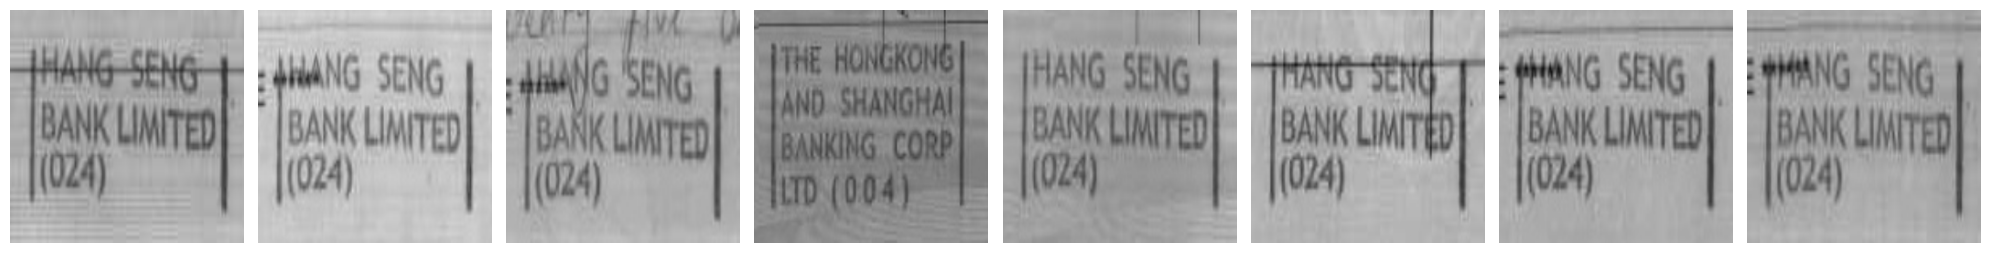

In [10]:
fig, axes = plt.subplots(1, 8, figsize=(20, 10))
axes = axes.flatten()

for i in range(8):
  axes[i].imshow(img[i].permute(1,2,0),cmap='gray',vmin = 0,vmax = 1)
  axes[i].axis('off')

plt.tight_layout()
plt.show()

# DCGAN [link](https://github.com/pytorch/examples/blob/main/dcgan/main.py#L229)

Check the link for the source code. Depend on the target size need to change the number of layer in Generator and Discriminator 

## Generator 

In [11]:
nc = 3
nz = 100
ngf=64
ndf=64

In [12]:
class Generator(nn.Module):
    # 64*64
    def __init__(self):
        super(Generator, self).__init__()        
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(ngf * 2,     ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(    ngf,      nc, 4, 2, 1, bias=False),
            nn.Sigmoid()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):        
        output = self.main(input)
        return output

In [13]:
class Generator(nn.Module):
    # 128*128
    def __init__(self):
        super(Generator, self).__init__()        
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(ngf, int(ngf/2), 4, 2, 1, bias=False),
            nn.BatchNorm2d(int(ngf/2)),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(int(ngf/2),      nc, 4, 2, 1, bias=False),
            nn.Sigmoid()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):        
        output = self.main(input)
        return output

In [14]:
class Generator(nn.Module):
    # 256*256
    def __init__(self):
        super(Generator, self).__init__()        
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(ngf, int(ngf/2), 4, 2, 1, bias=False),
            nn.BatchNorm2d(int(ngf/2)),
            nn.ReLU(True),
            nn.ConvTranspose2d(int(ngf/2), int(ngf/4), 4, 2, 1, bias=False),
            nn.BatchNorm2d(int(ngf/4)),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(int(ngf/4),nc, 4, 2, 1, bias=False),
            nn.Sigmoid()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):        
        output = self.main(input)
        return output

## Discriminator

In [15]:
class Discriminator(nn.Module):
    # 64*64
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        output = self.main(input)

        return output


In [16]:
class Discriminator(nn.Module):
    # 128*128
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 8, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 4, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        output = self.main(input)

        return output


In [17]:
class Discriminator(nn.Module):
    # 256*256
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 8, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Conv2d(ndf * 4, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 2, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        output = self.main(input)

        return output


## Weight

In [18]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        torch.nn.init.normal_(m.weight, 1.0, 0.02)
        torch.nn.init.zeros_(m.bias)

In [19]:
netG = Generator().to(device)
netG.apply(weights_init)

netD = Discriminator().to(device)
netD.apply(weights_init)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (12): BatchNorm2d(256, eps=1e-05, 

In [20]:
temp_input = torch.randn((16,3,256,256)).to(device)
temp_out = netD(temp_input)
temp_out.shape

torch.Size([16, 1, 1, 1])

In [21]:
temp_input = torch.randn((16,100,1,1)).to(device)
temp_out = netG(temp_input)
temp_out.shape

torch.Size([16, 3, 256, 256])

In [22]:
criterion = nn.BCELoss()

In [23]:
fixed_noise = torch.randn(batch, nz, 1, 1, device=device)
real_label = 1
fake_label = 0

Optimizer

In [24]:
beta1= 0.5
lr = 0.0002

In [25]:
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

## Training

In [26]:
num_epochs = 200

[Epoch 20/200] [Batch 35/35] [D loss: 1.260574] [G loss: 8.273680]


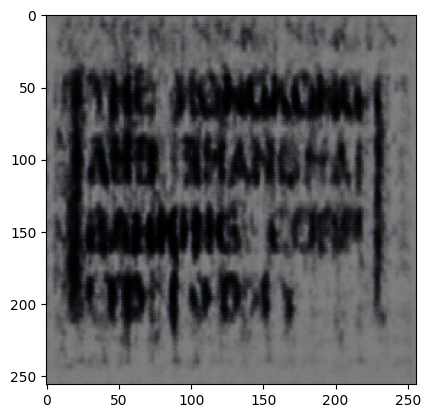

[Epoch 40/200] [Batch 35/35] [D loss: 0.449807] [G loss: 3.702356]


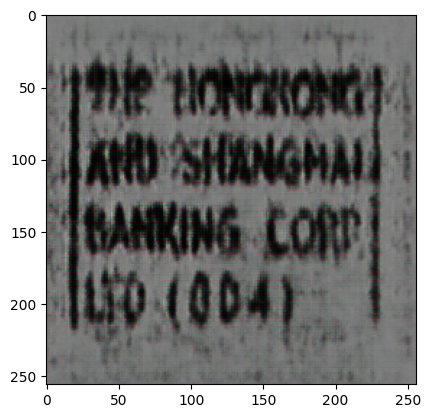

[Epoch 60/200] [Batch 35/35] [D loss: 0.059491] [G loss: 3.654936]


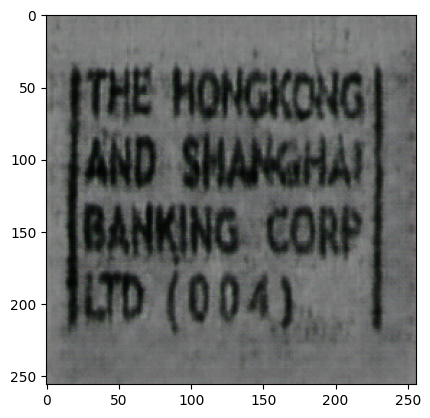

[Epoch 80/200] [Batch 35/35] [D loss: 0.259913] [G loss: 2.803903]


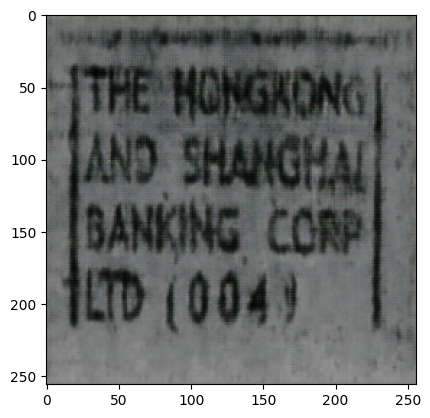

[Epoch 100/200] [Batch 35/35] [D loss: 0.074545] [G loss: 3.619631]


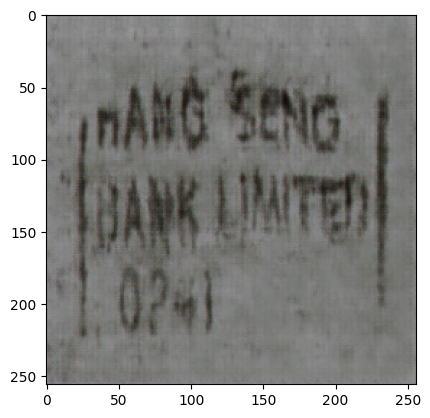

[Epoch 120/200] [Batch 35/35] [D loss: 0.059084] [G loss: 3.810678]


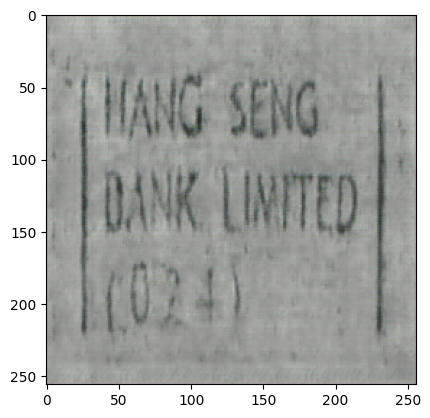

[Epoch 140/200] [Batch 35/35] [D loss: 0.047544] [G loss: 4.753977]


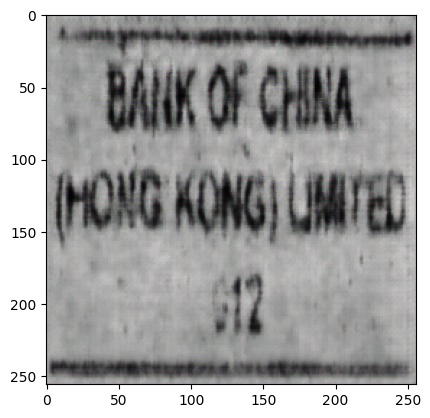

[Epoch 160/200] [Batch 35/35] [D loss: 0.021582] [G loss: 5.697169]


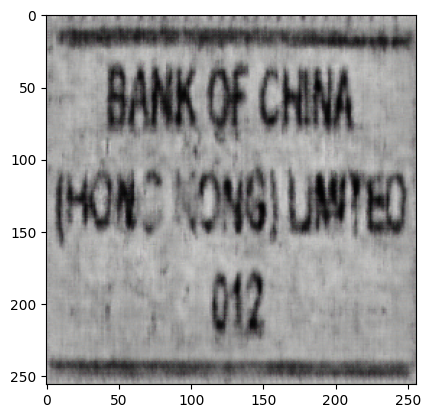

[Epoch 180/200] [Batch 35/35] [D loss: 0.007760] [G loss: 5.802506]


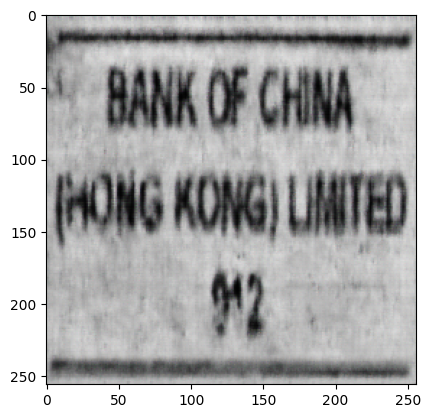

[Epoch 200/200] [Batch 35/35] [D loss: 0.007410] [G loss: 5.434863]


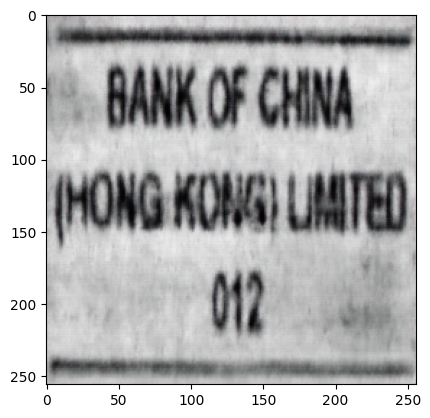

In [27]:
for epoch in range(num_epochs):
    for i, data in enumerate(train_loader,0):
        # Train Discr with real sample
        netD.zero_grad()
        real_img = data.to(device)
        btch_size = real_img.size(0)
        real =torch.ones((btch_size,),requires_grad=False).to(device)
        fake = torch.zeros((btch_size,),requires_grad=False).to(device)
        
        output = netD(real_img).view(-1)
        errD_real = criterion(output,real)
        errD_real.backward()
        
        # Train Discr with fake sample
        noise = torch.randn(btch_size,nz,1,1,device = device)
        fake_img = netG(noise)
        output = netD(fake_img.detach()).view(-1)
        errD_fake = criterion(output,fake)
        errD_fake.backward()
        
        errD = errD_real+errD_fake
        optimizerD.step()
        
        # Train Generator
        netG.zero_grad()
        output = netD(fake_img).view(-1)
        errG = criterion(output,real)
        errG.backward()
        optimizerG.step()
        
    if (epoch+1)  %20==0:
        print(
                "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
                % (epoch+1,num_epochs, i+1, len(train_loader), errD.item(), errG.item())
            )
        with torch.no_grad():
          fake_imgs = netG(fixed_noise.to(device))
          plt.imshow(fake_imgs[0].permute(1,2,0).cpu().detach().numpy(),cmap='gray')
          plt.show()
        
        

### Img size: 64*64

tensor(0.0065)


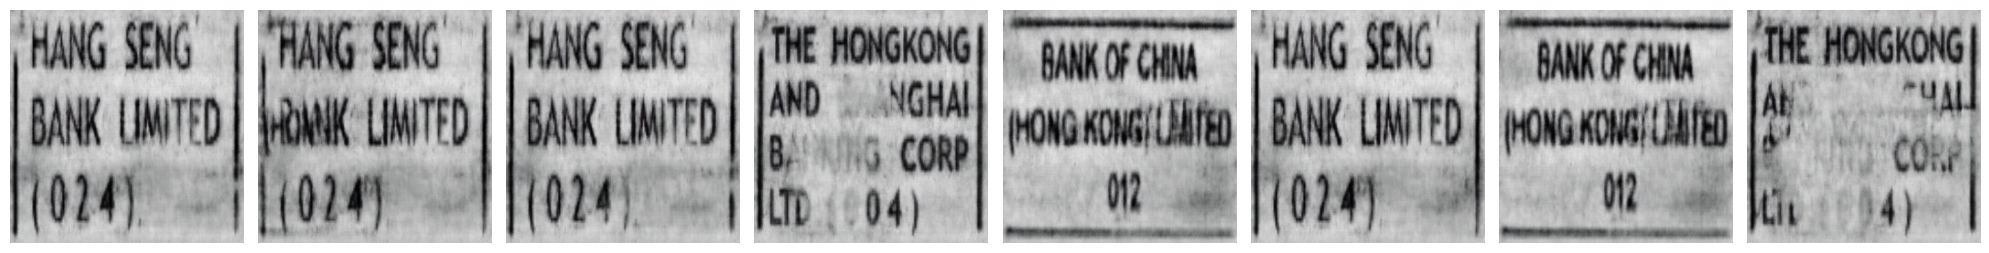

In [28]:
temp_rand = torch.rand((16,100,1,1))
with torch.no_grad():
  out_put = netG(temp_rand.to(device))
  print(out_put[0].min())
  fig, axes = plt.subplots(1, 8, figsize=(20, 10))
  axes = axes.flatten()

  for i in range(8):
    axes[i].imshow(out_put[i].permute(1,2,0).cpu().detach().numpy(),cmap='gray')
    axes[i].axis('off')

  plt.tight_layout()
  plt.show()


### Img size: 128*128

tensor(0.0048)


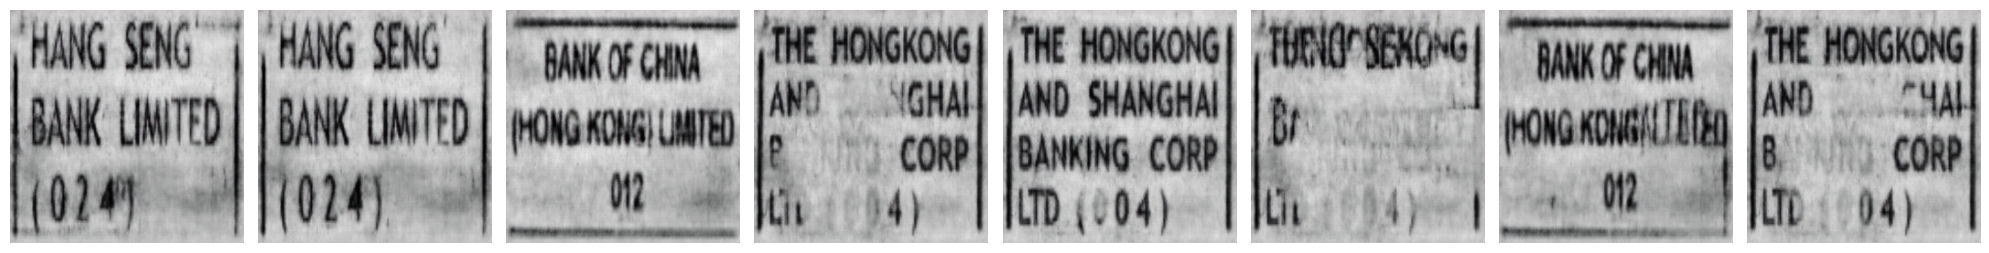

In [29]:
temp_rand = torch.rand((16,100,1,1))
with torch.no_grad():
  out_put = netG(temp_rand.to(device))
  print(out_put[0].min())
  fig, axes = plt.subplots(1, 8, figsize=(20, 10))
  axes = axes.flatten()

  for i in range(8):
    axes[i].imshow(out_put[i].permute(1,2,0).cpu().detach().numpy(),cmap='gray')
    axes[i].axis('off')

  plt.tight_layout()
  plt.show()


In [30]:
torch.save(netG.state_dict(),f'dcgan_128_128_generator.pth')

In [31]:
torch.save(netD.state_dict(),f'dcgan_128_128_disc.pth')

### Img size: 256*256

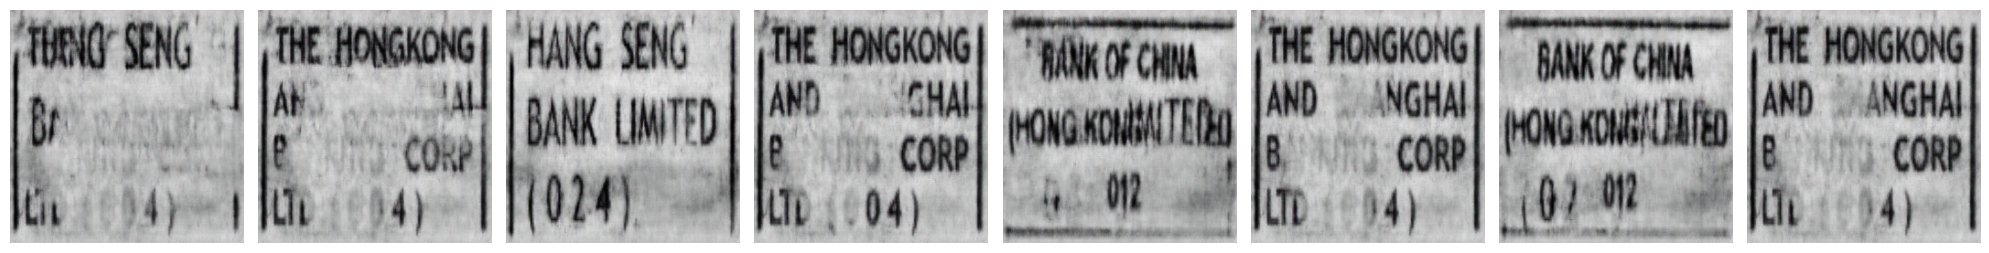

In [32]:
temp_rand = torch.rand((16,100,1,1))
with torch.no_grad():
  out_put = netG(temp_rand.to(device))
  fig, axes = plt.subplots(1, 8, figsize=(20, 10))
  axes = axes.flatten()

  for i in range(8):
    axes[i].imshow(out_put[i].permute(1,2,0).cpu().detach().numpy(),cmap='gray')
    axes[i].axis('off')

  plt.tight_layout()
  plt.show()


In [33]:
torch.save(netG.state_dict(),f'dcgan_256_256_generator.pth')

In [34]:
torch.save(netD.state_dict(),f'dcgan_256_256_disc.pth')